In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# Carga el conjunto de datos Iris desde un archivo CSV.
iris = pd.read_csv('./data/IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# mirar los valores unicos de (`species`)
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris_corr = iris.copy()
iris_corr['species'] = iris_corr['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

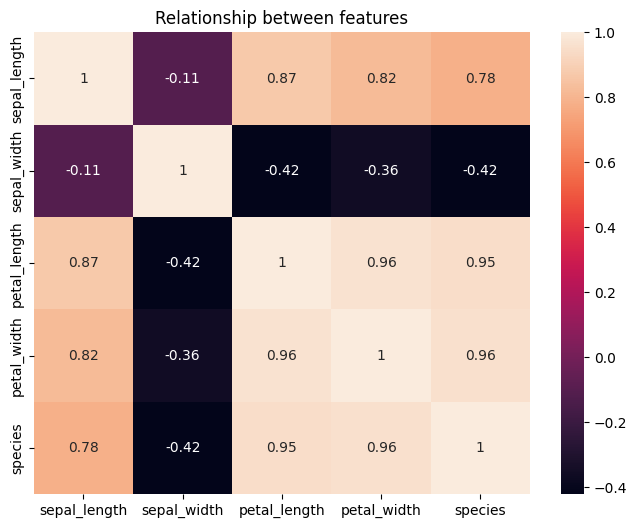

In [5]:
# Análisis de Correlación
plt.figure(figsize=(8,6))
sns.heatmap(iris_corr.corr(),annot=True) 
plt.title('Relationship between features')
plt.show()

In [6]:
# Asigna las características (variables de entrada) a X.
X = iris[['sepal_length','sepal_width','petal_length','petal_width']].values
# Asigna las etiquetas (variable objetivo) a y.
y = iris['species'].values

# Separa los datos en conjuntos de entrenamiento y prueba, 20% de los datos se usarán para pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
### Creación del algoritmo de KNN ##
from sklearn.metrics import mean_absolute_error, mean_squared_error


class KNNeightborsClasifier:
    """
    Una implementación del algoritmo K-Nearest Neighbors para clasificación y regresión.
    """
    def __init__(self, k=5, p=2, metric='euclidian', task='classification'):
        """
        Inicializa los parámetros del clasificador.

        Args:
            k (int): El número de vecinos más cercanos a considerar. Por defecto es 5.
            p (int): Parámetro para la distancia de Minkowski. p=1 para Manhattan, p=2 para Euclidian.
            metric (str): La métrica de distancia a utilizar ('euclidian' o 'manhattan').
            task (str): El tipo de tarea a realizar ('classification' o 'regression').
        """
        self.k = k
        self.p = p
        self.metric = metric
        self.task = task
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        Almacena los datos de entrenamiento para su uso posterior.
        
        Args:
            X_train (np.array): Las características de entrenamiento.
            y_train (np.array): Las etiquetas de entrenamiento.
        """    
        self.X_train = X_train
        self.y_train = y_train
        
    def _distance(self, p, q):
        """
        Calcula la distancia entre dos puntos (vectores).
        
        Args:
            p (np.array): El primer punto.
            q (np.array): El segundo punto.

        Returns:
            float: El valor de la distancia calculado.
        """
        if self.metric == 'euclidian':
            # Distancia Euclídea: np.sqrt(np.sum((p - q)**2))
            return np.sqrt(np.sum((p - q)**2))
        elif self.metric == 'manhattan':
            # Distancia de Manhattan: np.sum(np.abs(p - q))
            return np.sum(np.abs(p - q))
        else:
            raise ValueError(f'Unsupported metric: {self.metric}')
        
    def _predict_one(self, x):
        """
        Predice la etiqueta para un solo punto de datos.
        
        Args:
            x (np.array): Un solo punto de datos de prueba.

        Returns:
            La clase más común (para clasificación) o el promedio (para regresión).
        """
        # Calcula la distancia del punto de prueba a todos los puntos de entrenamiento.
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        
        # Obtiene los índices de los 'k' vecinos más cercanos.
        k_indexs = np.argsort(distances)[:self.k]
        
        # Obtiene las etiquetas de los 'k' vecinos más cercanos.
        k_labels = [self.y_train[i] for i in k_indexs]
    
        if self.task == 'classification':
            # Para clasificación, devuelve la clase más común.
            most_common = Counter(k_labels).most_common(1)[0][0]
            return most_common
        elif self.task == 'regression':
            # Para regresión, devuelve el promedio de las etiquetas.
            return np.mean(k_labels)

    def predict(self, X_test):
        """
        Realiza predicciones para todos los puntos en el conjunto de prueba.
        
        Args:
            X_test (np.array): Los datos de prueba.

        Returns:
            np.array: Un array con las predicciones para cada punto.
        """
        return np.array([self._predict_one(x) for x in X_test])
    
    def plot_predictions(self, X_test, y_pred):
        """
        Visualiza las predicciones del modelo en un gráfico de dispersión.

        Este método solo es efectivo para conjuntos de datos con 2 o 3 características.

        Args:
            X_test (np.array): Las características del conjunto de prueba.
            y_pred (np.array): Las etiquetas predichas por el modelo.
        """
        if X_test.shape[1] < 2:
            print("The result cannot be displayed with less than 2 features.")
            return

        # Mapea las etiquetas de texto a valores numéricos para el gráfico
        labels_map = {label: i for i, label in enumerate(np.unique(y_pred))}
        colors = [f'C{labels_map[label]}' for label in y_pred]

        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, marker='o', s=100, alpha=0.7)
        plt.title('Model prediction KNN')
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.grid(True)
        plt.show()
    
    def evaluate_classification(self, y_test, y_pred):
        """
        Calcula y muestra un conjunto completo de métricas de rendimiento para clasificación.

        Args:
            y_test (np.array): Las etiquetas verdaderas.
            y_pred (np.array): Las etiquetas predichas.
        """
        if self.task != 'classification':
            print("Classification metrics do not apply to regression tasks.")
            return

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

        print("### Model performance metrics (Classification) ###")
        print(f"  - Accuracy: {accuracy*100:.2f}%")
        print(f"  - Precision: {precision*100:.2f}%")
        print(f"  - Recall: {recall:.4f}")
        print(f"  - F1-Score: {f1:.4f}")
        print("\nConfusion matrix:")
        print(cm)
    
    def evaluate_regression(self, y_test, y_pred):
        """
        Calcula y muestra métricas de rendimiento para una tarea de regresión.

        Args:
            y_test (np.array): Las etiquetas verdaderas.
            y_pred (np.array): Las etiquetas predichas por el modelo.
        """
        if self.task != 'regression':
            print("Classification metrics do not apply to classification tasks.")
            return
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        print("### Model performance metrics (Regression) ###")
        print(f"  - Mean Square Error (MSE): {mse:.4f}")
        print(f"  - Mean Absolute Error (MAE): {mae:.4f}")

In [8]:
# Crea una instancia del clasificador KNN.
knn = KNNeightborsClasifier()
knn.fit(X_train=X_train, y_train=y_train)

In [9]:
# Realiza predicciones en el conjunto de prueba.
y_pred = knn.predict(X_test)

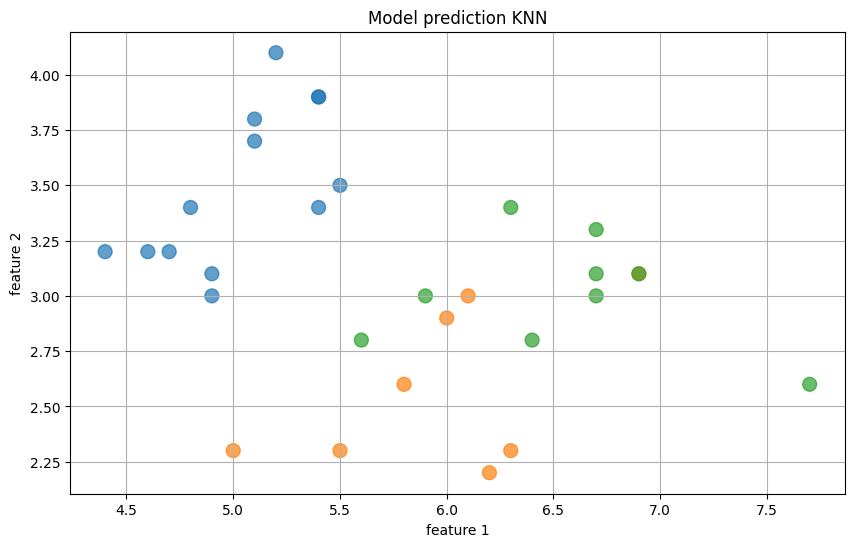

In [10]:
# visualización.
knn.plot_predictions(X_test,y_pred)

In [11]:
# Evaluacion de metricas.
knn.evaluate_classification(y_test,y_pred)

### Model performance metrics (Classification) ###
  - Accuracy: 100.00%
  - Precision: 100.00%
  - Recall: 1.0000
  - F1-Score: 1.0000

Confusion matrix:
[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
